# CNN 실습

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

import tensorflow as tf
from tensorflow import keras

In [2]:
SEED=12
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

## Fashion MNist 데이터

### 데이터 준비

In [3]:
from keras.datasets import fashion_mnist

(train_input, train_target), (test_input, test_target) = fashion_mnist.load_data()

In [6]:
train_input.shape, test_input.shape, train_target.shape, test_target.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

### 데이터 전처리

#### 피처데이터 스케일링 : 정규화

In [7]:
train_X = train_input / 255.0
test_X = test_input / 255.0

In [8]:
np.unique(train_target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

#### 학습/검증 데이터 분할

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_X, train_target,
                                                 test_size=0.2, random_state=42)

### 모델 구축 및 훈련

### 1) DNN 모델

In [10]:
from keras import Sequential, layers

#### 모델 정의

In [23]:
def build_DNN_model(a_layer=None):
    model = Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(layers.Dense(10, activation='softmax'))
#     model.build(input_shape=(None, 28*28,))
    return model

In [24]:
model = build_DNN_model()
model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

#### 모델 컴파일

In [25]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

#### 모델 학습

In [26]:
history = model.fit(train_X, train_y, epochs=20, verbose=2)

Epoch 1/20
1500/1500 - 2s - 1ms/step - accuracy: 0.8139 - loss: 0.5341
Epoch 2/20
1500/1500 - 1s - 983us/step - accuracy: 0.8578 - loss: 0.3981
Epoch 3/20
1500/1500 - 1s - 989us/step - accuracy: 0.8719 - loss: 0.3544
Epoch 4/20
1500/1500 - 2s - 1ms/step - accuracy: 0.8815 - loss: 0.3262
Epoch 5/20
1500/1500 - 2s - 1ms/step - accuracy: 0.8889 - loss: 0.3059
Epoch 6/20
1500/1500 - 2s - 1ms/step - accuracy: 0.8954 - loss: 0.2888
Epoch 7/20
1500/1500 - 2s - 1ms/step - accuracy: 0.8997 - loss: 0.2750
Epoch 8/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9036 - loss: 0.2631
Epoch 9/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9078 - loss: 0.2527
Epoch 10/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9114 - loss: 0.2427
Epoch 11/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9147 - loss: 0.2335
Epoch 12/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9176 - loss: 0.2255
Epoch 13/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9204 - loss: 0.2175
Epoch 14/20
1500/1500 - 1s - 979us/step - accuracy: 0.9235 - loss: 0.

In [31]:
def draw_metric_plot(history):
    plt.figure(figsize=(10,5))
    for i, item in enumerate(history.history.keys()):
        plt.subplot(1,2,i+1)
        plt.plot(history.history[item], label=item)
        plt.xlabel('epoch')
        plt.ylabel(item)
        plt.title(item + ' plot')
        plt.legend()
    plt.show()

def draw_metric_plot2(history):
    loss = ['loss', 'val_loss']
    acc = ['accuracy', 'val_accuracy']
    title = ['Loss', 'Accuracy']
    plt.figure(figsize=(10,5))
    for i, item in enumerate([loss, acc]):
        n = len(history.history[item[0]])
        plt.subplot(1,2,i+1)
        plt.plot(history.history[item[0]], label='train')
        plt.plot(history.history[item[1]], label='validation')
        plt.xlabel('epoch')
        plt.ylabel(title[i])
        plt.xticks(range(n), range(1, n+1))
        plt.title(title[i] + ' plot')
        plt.legend()
    plt.show()

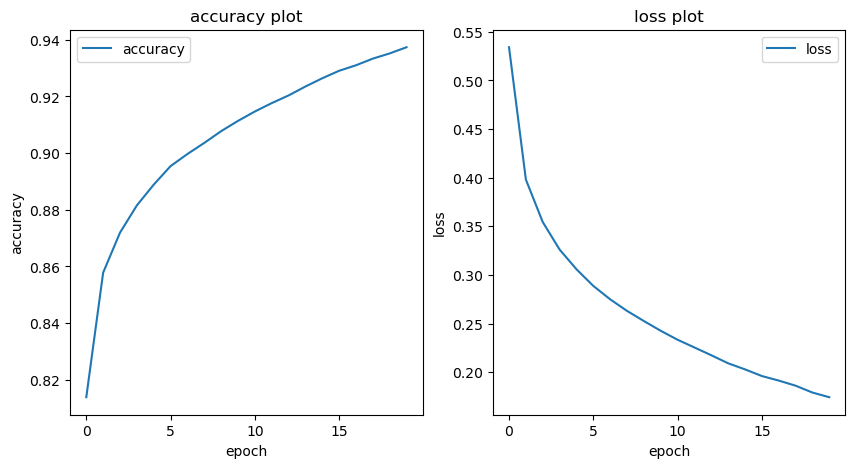

In [32]:
draw_metric_plot(history)

#### 손실 검증

Epoch 1/20
1500/1500 - 2s - 1ms/step - accuracy: 0.8159 - loss: 0.5254 - val_accuracy: 0.8529 - val_loss: 0.4191
Epoch 2/20
1500/1500 - 1s - 785us/step - accuracy: 0.8590 - loss: 0.3954 - val_accuracy: 0.8673 - val_loss: 0.3734
Epoch 3/20
1500/1500 - 1s - 797us/step - accuracy: 0.8733 - loss: 0.3518 - val_accuracy: 0.8725 - val_loss: 0.3543
Epoch 4/20
1500/1500 - 1s - 853us/step - accuracy: 0.8830 - loss: 0.3223 - val_accuracy: 0.8742 - val_loss: 0.3464
Epoch 5/20
1500/1500 - 1s - 925us/step - accuracy: 0.8904 - loss: 0.3000 - val_accuracy: 0.8756 - val_loss: 0.3438
Epoch 6/20
1500/1500 - 1s - 852us/step - accuracy: 0.8962 - loss: 0.2837 - val_accuracy: 0.8772 - val_loss: 0.3414
Epoch 7/20
1500/1500 - 1s - 785us/step - accuracy: 0.9023 - loss: 0.2698 - val_accuracy: 0.8804 - val_loss: 0.3412
Epoch 8/20
1500/1500 - 1s - 782us/step - accuracy: 0.9069 - loss: 0.2569 - val_accuracy: 0.8794 - val_loss: 0.3442
Epoch 9/20
1500/1500 - 1s - 792us/step - accuracy: 0.9111 - loss: 0.2458 - val_acc

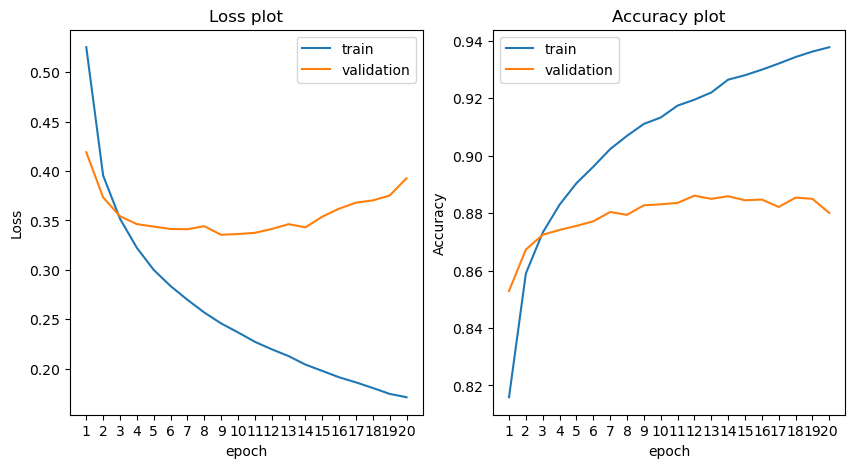

In [34]:
model2 = build_DNN_model()
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, epochs=20, verbose=2,
                   validation_data=(X_val, y_val))
draw_metric_plot2(history2)

#### 모델 성능 개선

- 드롭아웃

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1500/1500 - 3s - 2ms/step - accuracy: 0.7913 - loss: 0.5928 - val_accuracy: 0.8455 - val_loss: 0.4241
Epoch 2/20
1500/1500 - 2s - 1ms/step - accuracy: 0.8416 - loss: 0.4387 - val_accuracy: 0.8578 - val_loss: 0.3865
Epoch 3/20
1500/1500 - 2s - 1ms/step - accuracy: 0.8523 - loss: 0.4046 - val_accuracy: 0.8581 - val_loss: 0.3747
Epoch 4/20
1500/1500 - 2s - 1ms/step - accuracy: 0.8607 - loss: 0.3811 - val_accuracy: 0.8662 - val_loss: 0.3592
Epoch 5/20
1500/1500 - 2s - 1ms/step - accuracy: 0.8665 - loss: 0.3654 - val_accuracy: 0.8696 - val_loss: 0.3493
Epoch 6/20
1500/1500 - 2s - 1ms/step - accuracy: 0.8727 - loss: 0.3509 - val_accuracy: 0.8717 - val_loss: 0.3504
Epoch 7/20
1500/1500 - 2s - 1ms/step - accuracy: 0.8715 - loss: 0.3443 - val_accuracy: 0.8727 - val_loss: 0.3423
Epoch 8/20
1500/1500 - 2s - 1ms/step - accuracy: 0.8770 - loss: 0.3347 - val_accuracy: 0.8743 - val_loss: 0.3375
Epoch 9/20
1500/1500 - 2s - 1ms/step - accuracy: 0.8780 - loss: 0.3274 - val_accuracy: 0.8775 - 

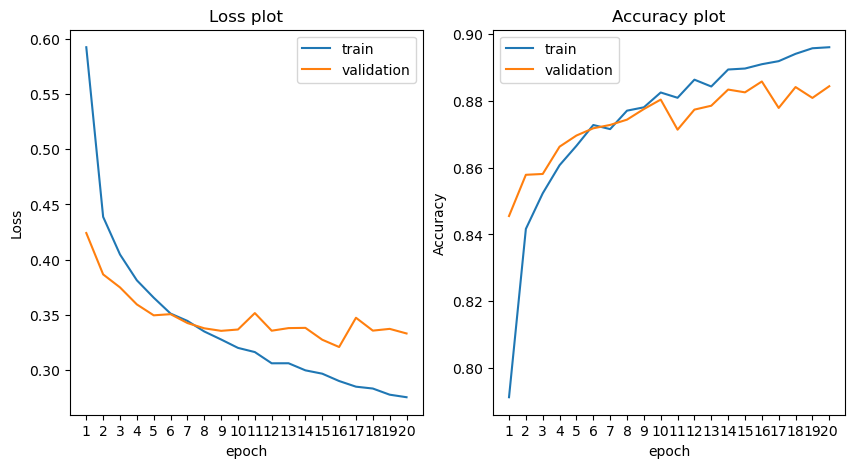

In [36]:
model3 = build_DNN_model(layers.Dropout(0.3))
model3.summary()
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, epochs=20, verbose=2,
                   validation_data=(X_val, y_val))
draw_metric_plot2(history3)

- 콜백: 조기종료, 모델체크(최적성능 모델)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1500/1500 - 2s - 1ms/step - accuracy: 0.7944 - loss: 0.5861 - val_accuracy: 0.8413 - val_loss: 0.4379
Epoch 2/20
1500/1500 - 1s - 894us/step - accuracy: 0.8407 - loss: 0.4408 - val_accuracy: 0.8539 - val_loss: 0.3963
Epoch 3/20
1500/1500 - 1s - 827us/step - accuracy: 0.8532 - loss: 0.4048 - val_accuracy: 0.8652 - val_loss: 0.3671
Epoch 4/20
1500/1500 - 1s - 842us/step - accuracy: 0.8605 - loss: 0.3811 - val_accuracy: 0.8692 - val_loss: 0.3635
Epoch 5/20
1500/1500 - 1s - 822us/step - accuracy: 0.8662 - loss: 0.3667 - val_accuracy: 0.8714 - val_loss: 0.3457
Epoch 6/20
1500/1500 - 1s - 833us/step - accuracy: 0.8702 - loss: 0.3524 - val_accuracy: 0.8740 - val_loss: 0.3440
Epoch 7/20
1500/1500 - 1s - 868us/step - accuracy: 0.8738 - loss: 0.3429 - val_accuracy: 0.8740 - val_loss: 0.3494
Epoch 8/20
1500/1500 - 1s - 846us/step - accuracy: 0.8753 - loss: 0.3350 - val_accuracy: 0.8763 - val_loss: 0.3431
Epoch 9/20
1500/1500 - 1s - 822us/step - accuracy: 0.8808 - loss: 0.3214 - val_acc

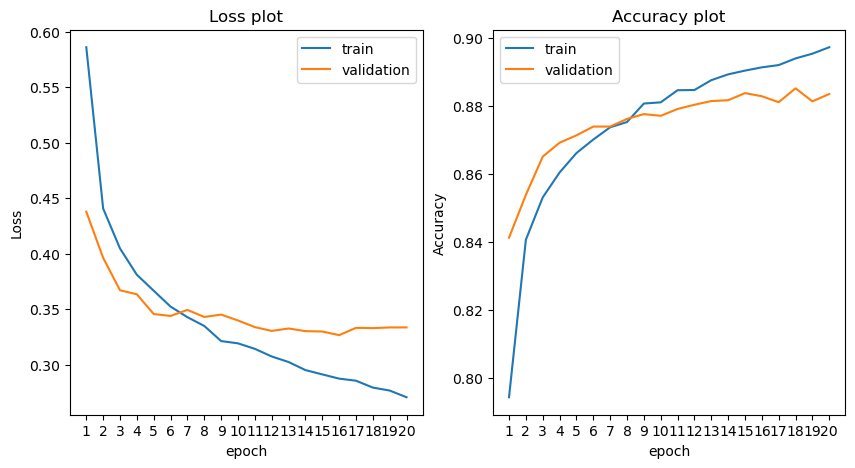

In [37]:
model4 = build_DNN_model(layers.Dropout(0.3))
model4.summary()
model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
checkpt = keras.callbacks.ModelCheckpoint('model/fashion_dnn_best.keras')
earlystop = keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)
history4 = model4.fit(X_train, y_train, epochs=20, verbose=2,
                   validation_data=(X_val, y_val),
                     callbacks=[checkpt,earlystop])
print(f'stop epoch = {earlystop.stopped_epoch}')
draw_metric_plot2(history4)

In [39]:
print(f'val_loss = {history4.history["val_loss"][-1]:.4f}')
print(f'val_accuracy = {history4.history["val_accuracy"][-1]:.4f}')

val_loss = 0.3337
val_accuracy = 0.8836


#### 모델 저장 및 복원

- 모델저장 : 모델객체.save(파일경로) 
- 모델의 가중치 저장 : 모델객체.save_weights(파일경로)
- 모델불러오기 : 모델객체  = keras.models.load_model(파일경로)
- 모델의 가중치 불러오기 : 모델객체.load_weights(파일경로)

In [40]:
filepath = 'model/bestmodel.keras'
model4.save(filepath)
best_model = keras.models.load_model(filepath)

#### 모델 평가

In [41]:
best_model.evaluate(test_X, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.8782 - loss: 0.3591


[0.3573280870914459, 0.8777999877929688]

#### 예측

In [42]:
y_pred_proba = best_model.predict(test_X)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step


In [43]:
y_pred = np.argmax(y_pred_proba, axis=1)

In [44]:
y_pred[:20]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 2, 8, 0])

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

confusion_matrix(y_pred, test_target)

array([[874,   5,  23,  35,   0,   0, 151,   0,   6,   0],
       [  1, 970,   4,  15,   0,   0,   1,   0,   0,   0],
       [ 11,   3, 837,  19, 136,   0, 109,   0,   4,   0],
       [ 14,  13,   4, 855,  25,   1,  18,   0,   3,   0],
       [  2,   4,  77,  31, 770,   0,  61,   0,   5,   0],
       [  0,   0,   0,   0,   0, 939,   0,  11,   1,   4],
       [ 93,   3,  55,  40,  68,   0, 654,   0,  11,   1],
       [  0,   0,   0,   0,   0,  32,   0, 946,   4,  28],
       [  5,   2,   0,   4,   1,   1,   6,   0, 966,   0],
       [  0,   0,   0,   1,   0,  27,   0,  43,   0, 967]])

In [45]:
accuracy_score(y_pred, test_target)

0.8778

### DNN 모델을 다르게 구성

- 2개의 은닉층, 1개의 출력층으로 구성
- 마지막 은닉층에서 드롭아웃층을 둠

#### build_model() 에서 은닉층의 노드(뉴런)수를 80개로 한경우 성능 확인

----

### 2) CNN 모델

#### 데이터 준비

In [56]:
(train_input, train_target), (test_input, test_target) = fashion_mnist.load_data()

- 데이터 차원 변경 및 정규화

In [57]:
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

- 훈련/검증 데이터 분할

In [58]:
X_tr, X_val, y_tr, y_val = train_test_split(train_scaled, train_target, 
                                           test_size=0.2, random_state=42)
X_tr.shape

(48000, 28, 28, 1)

#### 모델 정의

In [61]:
from keras.layers import Conv2D, MaxPooling2D

def build_CNN_model():
    inputs = keras.Input(shape=(28,28,1))
    x = Conv2D(filters=32, #필터 수
                     kernel_size=3, 
                     strides=(1,1), 
                     padding='same', 
                    activation='relu')(inputs)
    x = MaxPooling2D(pool_size=2)(x)
    x = Conv2D(filters=64, #필터 수 더 늘려줌
                     kernel_size=3, 
                     strides=(1,1), 
                     padding='same', 
                    activation='relu')(x)
    x = MaxPooling2D(pool_size=2)(x)
    x = Conv2D(filters=128, #필터 수 더 늘려줌
                     kernel_size=3, #padding default는 valid 패딩
                    activation='relu')(x)
    x = MaxPooling2D(pool_size=2)(x)
    x = layers.Flatten()(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

In [62]:
model_cnn = build_CNN_model()
model_cnn.summary()

Model: "functional_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 5, 5, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97,802 (382.04 KB)

 Trainable params: 97,802 (382.04 KB)

 Non-trainable params: 0 (0.00 B)

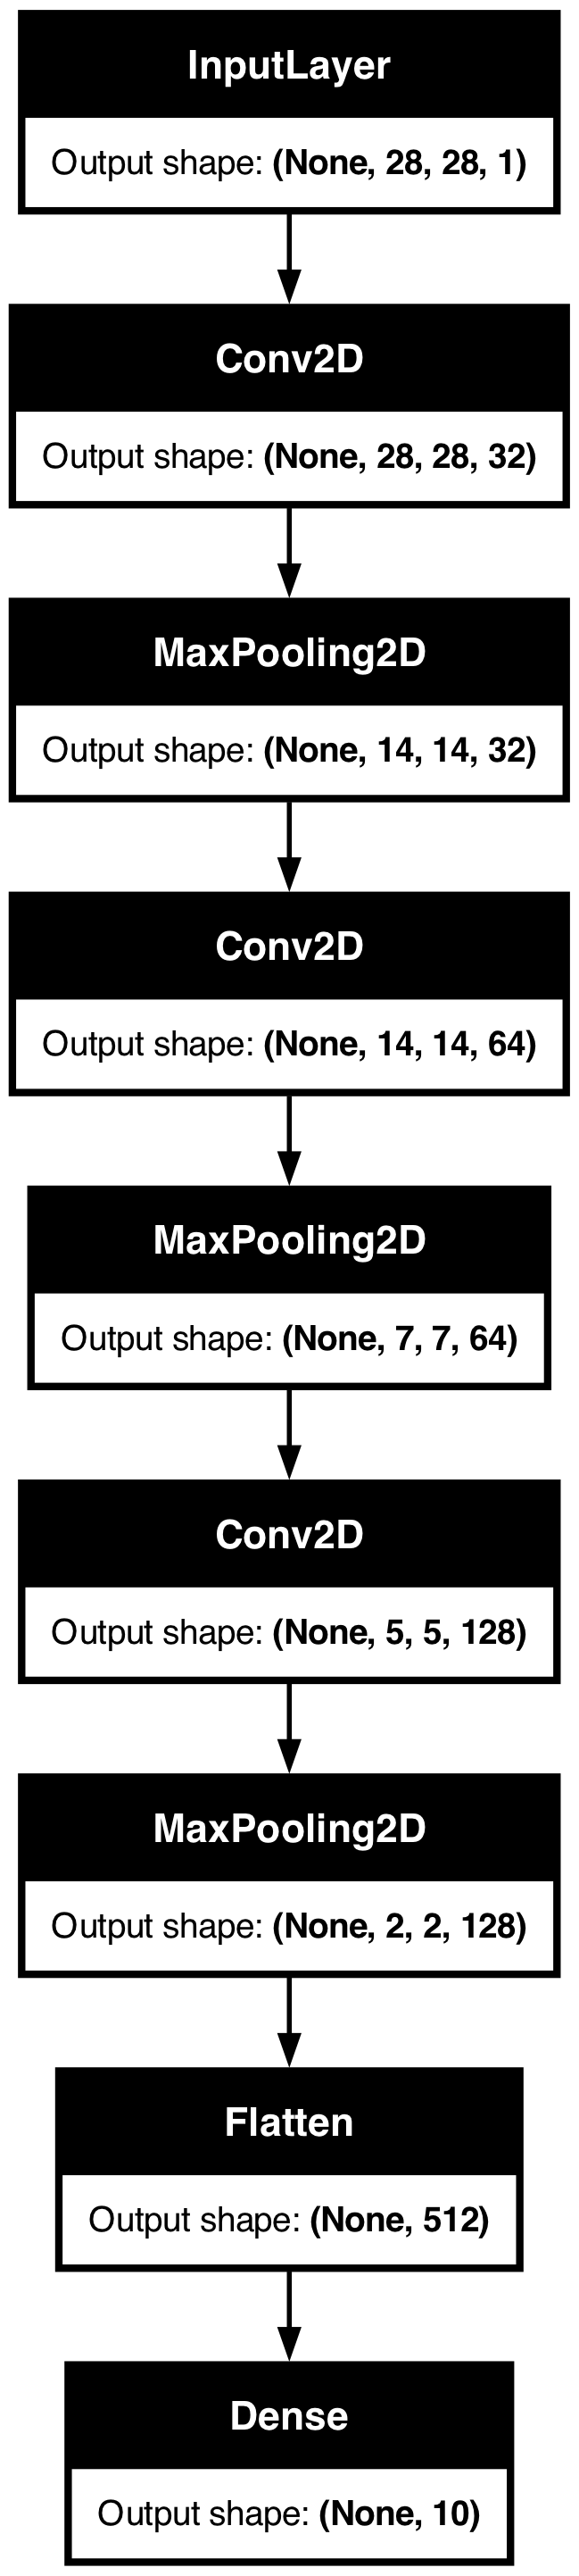

In [63]:
keras.utils.plot_model(model_cnn, show_shapes=True, to_file='model/fashion_CNN1.png')

#### 모델 컴파일

In [64]:
model_cnn.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

#### 모델 학습

In [67]:
checkpt_cnn = keras.callbacks.ModelCheckpoint('model/fashion-best-cnn-model.keras')
early_stop_cnn = keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)
history_cnn = model_cnn.fit(X_tr, y_tr, epochs=20, batch_size=64, verbose=2,
             validation_data=(X_val, y_val), 
              callbacks=[checkpt_cnn, early_stop_cnn])

Epoch 1/20
750/750 - 43s - 58ms/step - accuracy: 0.8745 - loss: 0.3460 - val_accuracy: 0.8789 - val_loss: 0.3298
Epoch 2/20
750/750 - 43s - 58ms/step - accuracy: 0.8904 - loss: 0.2993 - val_accuracy: 0.8814 - val_loss: 0.3190
Epoch 3/20
750/750 - 44s - 59ms/step - accuracy: 0.9027 - loss: 0.2686 - val_accuracy: 0.8850 - val_loss: 0.3091
Epoch 4/20
750/750 - 44s - 59ms/step - accuracy: 0.9120 - loss: 0.2436 - val_accuracy: 0.8906 - val_loss: 0.2980
Epoch 5/20
750/750 - 43s - 58ms/step - accuracy: 0.9193 - loss: 0.2223 - val_accuracy: 0.8933 - val_loss: 0.2940
Epoch 6/20
750/750 - 42s - 57ms/step - accuracy: 0.9272 - loss: 0.2030 - val_accuracy: 0.8971 - val_loss: 0.2870
Epoch 7/20
750/750 - 45s - 59ms/step - accuracy: 0.9345 - loss: 0.1844 - val_accuracy: 0.8995 - val_loss: 0.2813
Epoch 8/20
750/750 - 53s - 71ms/step - accuracy: 0.9409 - loss: 0.1671 - val_accuracy: 0.9007 - val_loss: 0.2861
Epoch 9/20
750/750 - 45s - 60ms/step - accuracy: 0.9457 - loss: 0.1510 - val_accuracy: 0.8997 - 

#### 손실 검증

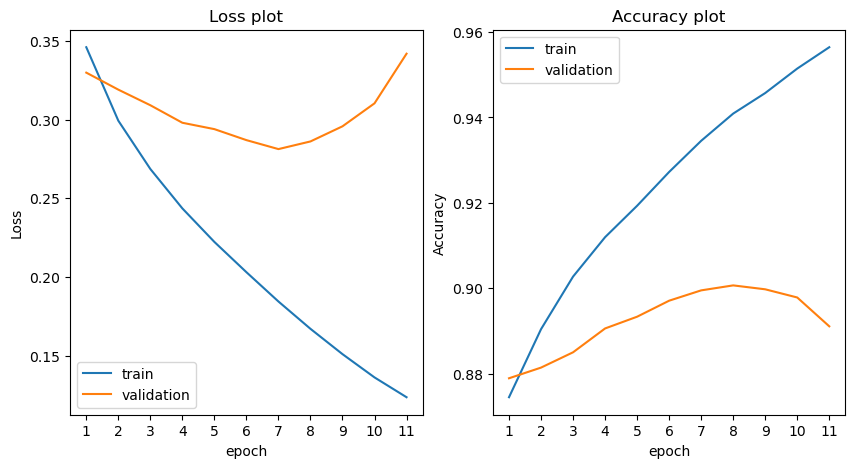

Stop epoch = 10
accuracy:0.9564 loss:0.1236 val_accuracy:0.8911 val_loss:0.3419 
accuracy:0.9378 loss:0.1712 val_accuracy:0.8801 val_loss:0.3928 


In [68]:
draw_metric_plot2(history_cnn)
print(f'Stop epoch = {early_stop_cnn.stopped_epoch}')
# CNN
for key in history_cnn.history.keys():
    print(f'{key}:{history_cnn.history[key][-1]:.4f}', end=' ')
print()
# DNN (드롭아웃 30% 적용)
for key in history2.history.keys():
    print(f'{key}:{history2.history[key][-1]:.4f}', end=' ')
print()

=> CNN이 DNN보다 성능이 더 좋음
- CNN : val_accuracy:0.8911 val_loss:0.3419 
- DNN : val_accuracy:0.8801 val_loss:0.3928 

#### 모델 성능 개선

- 드롭아웃, 콜백

In [69]:
def build_CNN_model2():
    inputs = keras.Input(shape=(28,28,1))
    x = Conv2D(filters=32, #필터 수
                kernel_size=3, strides=(1,1), 
                padding='same', activation='relu')(inputs)
    x = MaxPooling2D(pool_size=2)(x)
    x = Conv2D(filters=64, #필터 수 더 늘려줌
                kernel_size=3, strides=(1,1), 
                padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=2)(x)
    x = Conv2D(filters=128, #필터 수 더 늘려줌
                kernel_size=3, #padding default는 valid 패딩
                activation='relu')(x)
    x = MaxPooling2D(pool_size=2)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(100, activation='relu')(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

model_cnn2 = build_CNN_model2()
model_cnn2.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
checkpt_cnn2 = keras.callbacks.ModelCheckpoint('model/fashion-best-cnn-model2.keras')
early_stop_cnn2 = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history_cnn2 = model_cnn2.fit(X_tr, y_tr, epochs=20, batch_size=64, verbose=2,
             validation_data=(X_val, y_val), 
              callbacks=[checkpt_cnn2, early_stop_cnn2])

Epoch 1/20
750/750 - 47s - 63ms/step - accuracy: 0.7744 - loss: 0.6278 - val_accuracy: 0.8568 - val_loss: 0.3815
Epoch 2/20
750/750 - 44s - 59ms/step - accuracy: 0.8635 - loss: 0.3833 - val_accuracy: 0.8794 - val_loss: 0.3282
Epoch 3/20
750/750 - 43s - 57ms/step - accuracy: 0.8830 - loss: 0.3254 - val_accuracy: 0.8855 - val_loss: 0.3031
Epoch 4/20
750/750 - 44s - 59ms/step - accuracy: 0.8954 - loss: 0.2906 - val_accuracy: 0.8928 - val_loss: 0.2950
Epoch 5/20
750/750 - 44s - 58ms/step - accuracy: 0.9044 - loss: 0.2640 - val_accuracy: 0.8968 - val_loss: 0.2813
Epoch 6/20
750/750 - 47s - 63ms/step - accuracy: 0.9124 - loss: 0.2401 - val_accuracy: 0.9010 - val_loss: 0.2728
Epoch 7/20
750/750 - 45s - 60ms/step - accuracy: 0.9185 - loss: 0.2212 - val_accuracy: 0.9031 - val_loss: 0.2739
Epoch 8/20
750/750 - 44s - 58ms/step - accuracy: 0.9235 - loss: 0.2089 - val_accuracy: 0.9054 - val_loss: 0.2680
Epoch 9/20
750/750 - 43s - 57ms/step - accuracy: 0.9301 - loss: 0.1903 - val_accuracy: 0.9047 - 

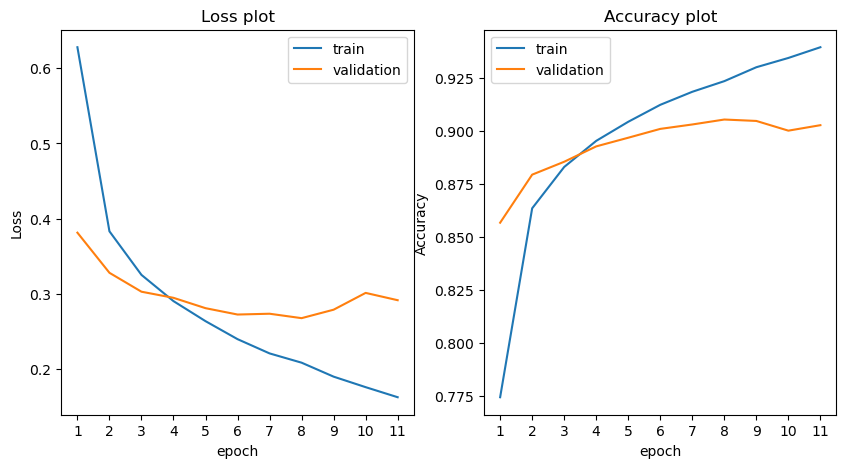

Stop epoch = 10
accuracy:0.9395 loss:0.1630 val_accuracy:0.9028 val_loss:0.2918 


In [70]:
draw_metric_plot2(history_cnn2)
print(f'Stop epoch = {early_stop_cnn2.stopped_epoch}')
# CNN
for key in history_cnn2.history.keys():
    print(f'{key}:{history_cnn2.history[key][-1]:.4f}', end=' ')
print()

=> CNN이 DNN보다 성능이 더 좋음, dropout을 쓰면 더 좋음
- CNN : val_accuracy:0.8911 val_loss:0.3419 
- DNN : val_accuracy:0.8801 val_loss:0.3928 
- CNN (dropout) : val_accuracy:0.9028 val_loss:0.2918 

#### 모델 평가

In [71]:
model_cnn2.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8978 - loss: 0.2991


[0.28668975830078125, 0.8996000289916992]

#### 예측

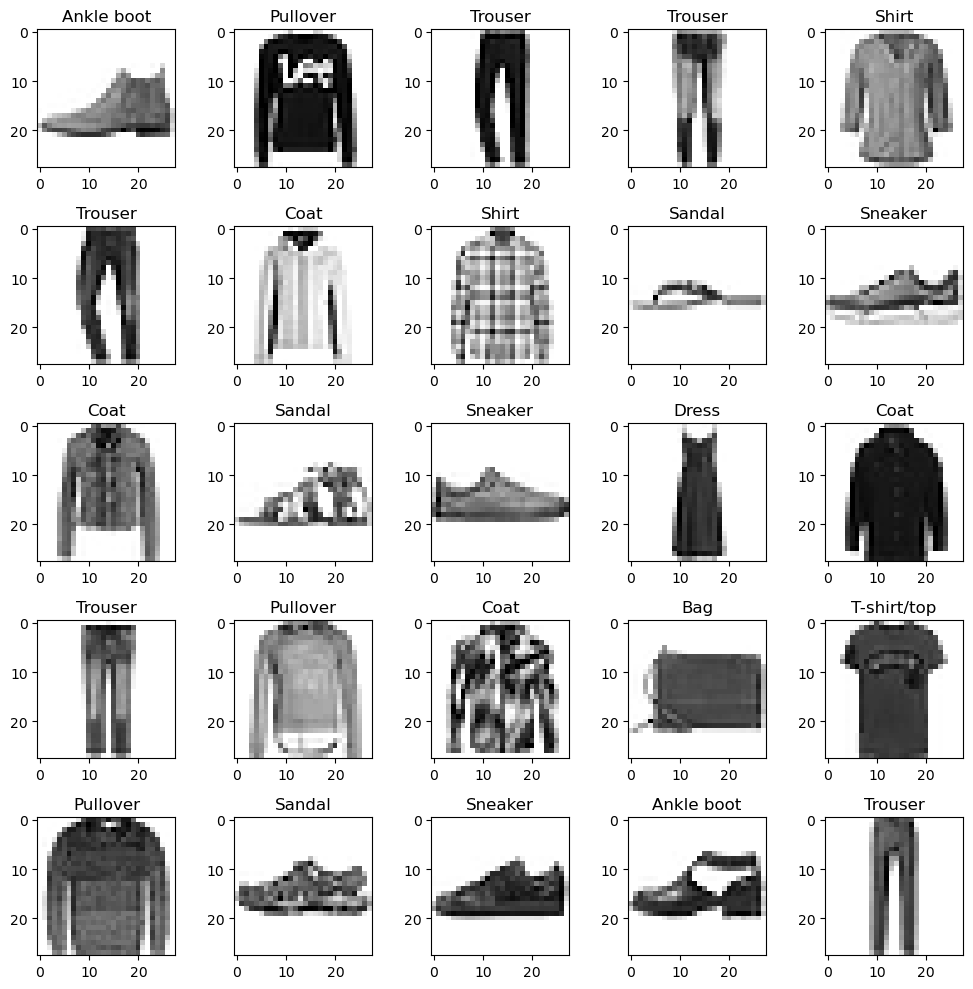

In [72]:
target_labels =  {0: 'T-shirt/top', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat',
                 5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle boot'}
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(test_scaled[i].reshape(28,28), cmap='gray_r')
    plt.title(target_labels[test_target[i]])
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


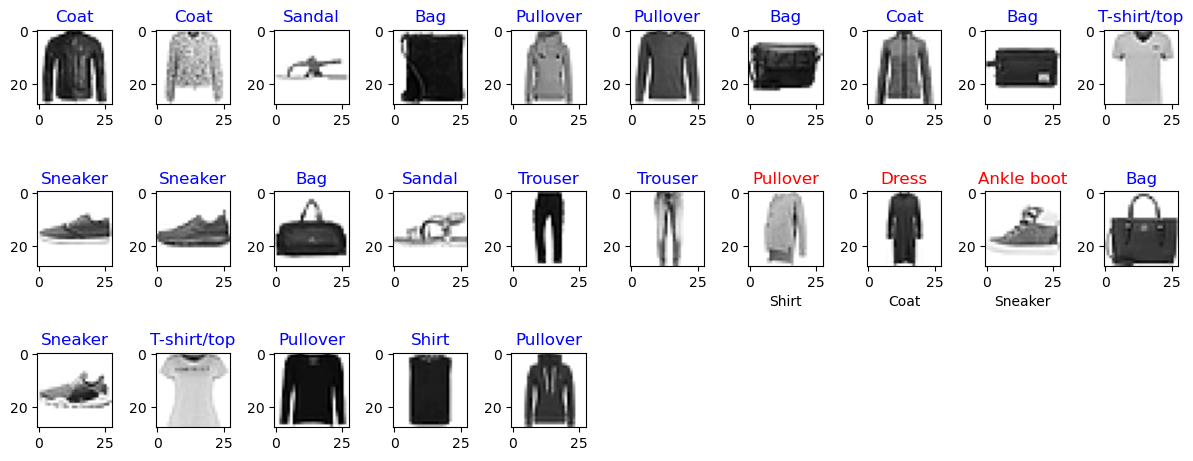

In [75]:
pred_proba2 = model_cnn2.predict(test_scaled)
preds2 = np.argmax(pred_proba2,axis=1)

#시각화
n = 50 # i+n을 해주면 50번째 값부터 보여줌
plt.figure(figsize=(12,8))
for i in range(25):
    plt.subplot(5,10,i+1)
    plt.imshow(test_scaled[i+n].reshape(28,28), cmap='gray_r')
    if preds2[i+n] == test_target[i+n]:
        plt.title(target_labels[test_target[i+n]], fontdict={'color':'blue'})
    else:
        plt.title(target_labels[test_target[i+n]], fontdict={'color':'red'})
        plt.xlabel(target_labels[preds2[i+n]]) #예측한 값 찍어주기 - sandal로 예측
plt.tight_layout()
plt.show()
#빨간색으로 나온건 잘못 예측한 것

----